<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Geron10_Intro_to_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing MLPs with Keras

### Building an Image Classifier Using the Sequential API

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

#### Creating the Model Using the Sequential API

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

W0710 08:47:57.492129 139636251805568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.layers
model.layers[1].name
#model.get_layer('dense_3').name

'dense_3'

In [13]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01503728, -0.05699985,  0.01687996, ..., -0.05489433,
         0.01371884,  0.04520964],
       [ 0.04580186,  0.00427995,  0.06365997, ..., -0.04532593,
         0.01539738,  0.06797412],
       [ 0.06407946,  0.00896972, -0.06395225, ..., -0.03237554,
        -0.00124098,  0.02909163],
       ...,
       [-0.06740418,  0.04015753,  0.03372011, ..., -0.0542163 ,
        -0.02707728,  0.029973  ],
       [ 0.00637474,  0.06874329,  0.01942719, ..., -0.04886399,
         0.00256976, -0.02806403],
       [ 0.03410461,  0.04210812, -0.04232227, ...,  0.06503583,
        -0.02423177, -0.04210303]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
biases.shape

(300,)

#### Compiling the Model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### Training and Evaluating the Model

In [18]:
model_fit = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.6995 - acc: 0.7705 - val_loss: 0.5347 - val_acc: 0.8194
Epoch 2/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4842 - acc: 0.8319 - val_loss: 0.4437 - val_acc: 0.8496
Epoch 3/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4388 - acc: 0.8469 - val_loss: 0.4087 - val_acc: 0.8588
Epoch 4/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4124 - acc: 0.8544 - val_loss: 0.3970 - val_acc: 0.8644
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3928 - acc: 0.8622 - val_loss: 0.3873 - val_acc: 0.8644
Epoch 6/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3770 - acc: 0.8678 - val_loss: 0.3742 - val_acc: 0.8680
Epoch 7/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3642 - acc: 0.8701 - val_lo

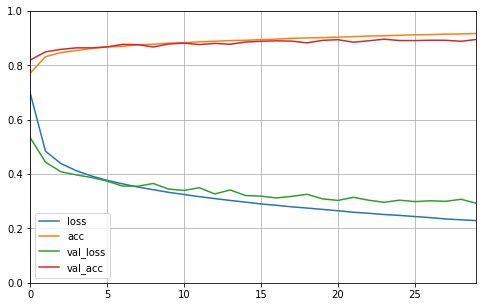

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # plt.gca(): Get the current Axes instance on the current figure matching the given keyword args, or create one.
plt.show()

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 59.2613 - acc: 0.8583


[59.26126955986023, 0.8583]

#### Using the Model to Make Predictions

In [21]:
# Using the Model to Make Predictions
# Since we don’t have actual new instances, we will just use the first 3 instances of the test set:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# If you only care about the class with the highest estimated probability(even if that probability is quite low),
# then you can use the predict_classes() method instead:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
#  the classifier actually classified all three images correctly:
y_test[:3]

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [0]:
# use Scikit-Learn’s fetch_california_housing() function to load the data:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
housing = fetch_california_housing()

I0710 08:51:58.039066 139636251805568 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [53]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit_transform:　Fit to data, then transform it.  So after this step, the scaler object has the mean and std attribute of X_train
X_valid_scaled = scaler.transform(X_valid) # Using the mean and std attribute of X_train to standardize X_valid
X_test_scaled = scaler.transform(X_test) # Using the mean and std attribute of X_train to standardize X_test
print(scaler.mean_)
print(np.mean(X_train[:,0]))

[ 3.86078633e+00  2.87113695e+01  5.43408177e+00  1.09832747e+00
  1.41715926e+03  3.14697097e+00  3.56334625e+01 -1.19572295e+02]
3.8607863307493546


In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]), # the input_shape is start from index 1 of the X_train.shape, since the index 0 is the sample size
    keras.layers.Dense(1)
])

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [59]:
model_fit = model.fit(X_train_scaled, y_train, epochs=20, validation_data = (X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.9452 - val_loss: 0.5647
Epoch 2/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5319 - val_loss: 0.4971
Epoch 3/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4911 - val_loss: 0.4721
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4668 - val_loss: 0.4479
Epoch 5/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4507 - val_loss: 0.4340
Epoch 6/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4412 - val_loss: 0.4276
Epoch 7/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4327 - val_loss: 0.4155
Epoch 8/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4327 - val_loss: 0.4170
Epoch 9/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4197 - val_l

In [60]:
mse_test = model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 26us/sample - loss: 0.3931


In [61]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

array([[0.6941538],
       [0.9407015],
       [4.116179 ]], dtype=float32)

### Building Complex Models Using the Functional API
p.331

One example of a non-sequential neural network is a **Wide & Deep neural network**.
It connects all or part of the inputs directly to the output layer.

In [0]:
# Let’s build such a neural network to tackle the California housing problem:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

if we want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use **multiple inputs**.

In [0]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [43]:
model.compile(loss='mse', optimizer='sgd')

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

p.334   ....

### Building Dynamic Models Using the Subclassing API
p.336

### Saving and Restoring a Model
p.337

In [0]:
# Saving a trained Keras model is as simple as it gets:
model.save("my_keras_model.h5")

In [0]:
# Loading the model
model = keras.models.load_model("my_keras_model.h5")

### Using Callbacks
The `fit()` method accepts a **callbacks argument** that lets you specify a list of objects
that Keras will call *during training at the start and end of training*, *at the start and end
of each epoch* and even *before and after processing each batch*.

In [0]:
# [...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks =[checkpoint_cb])

set **`save_best_only=True`** when creating the **`ModelCheckpoint`**. In this case, it will only
save your model when its performance on the validation set is the best so far.

In [0]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                set_best_only = True)
history = model.fit(X_train, y_train, epochs = 10, 
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Another way to implement early stopping is to simply use the **`EarlyStopping`** call‐
back. It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the **`patience`** argument), and it will optionally roll
back to the best model.

In [0]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

###Visualization Using TensorBoard
p.339

In [0]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [0]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
  
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [0]:
# [...] # Build and compile your model

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.7207 - acc: 0.7658 - val_loss: 0.5258 - val_acc: 0.8250
Epoch 2/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4900 - acc: 0.8283 - val_loss: 0.4537 - val_acc: 0.8426
Epoch 3/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4428 - acc: 0.8450 - val_loss: 0.4164 - val_acc: 0.8584
Epoch 4/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4141 - acc: 0.8538 - val_loss: 0.4006 - val_acc: 0.8610
Epoch 5/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3933 - acc: 0.8623 - val_loss: 0.3828 - val_acc: 0.8672
Epoch 6/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3788 - acc: 0.8661 - val_loss: 0.3762 - val_acc: 0.8690
Epoch 7/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.3648 - acc: 0.8707 - val_lo

In [0]:
!tensorboard --logdir=./my_logs --port=6006
!TensorBoard 2.0.0 at http://mycomputer.local:6006

TensorBoard 1.14.0 at http://c6baa84c8a09:6006/ (Press CTRL+C to quit)
^C
/bin/bash: TensorBoard: command not found


## Fine-Tuning Neural Network Hyperparameters
p.342

The flexibility of neural networks is also one of their main drawbacks: there are many
hyperparameters to tweak.  How do you know what combination of hyperpara‐
meters is the best for your task?
One option is to simply try many combinations of hyperparameters and see which
one works best on the validation set (or using K-fold cross-validation).
For this, one approach is simply use **GridSearchCV** or **RandomizedSearchCV** to explore the hyper‐
parameter space. 

For this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. 
</br>The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  options = {'input_shape': input_shape} # The options dict is used to ensure that the first layer is properly given the input shape
  for layers in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu', **options))
    options={}
  model.add(keras.layers.Dense(1, **options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model
  

Next, let’s create a KerasRegressor based on this build_model() function:
<br/>The KerasRegressor object is a thin wrapper around the Keras model built using
build_model(). 

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

 it will just use the default hyperparameters we defined in build_model(). 

In [65]:
keras_reg.fit(X_train_scaled, y_train, epochs=10,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_scaled, y_test)


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 79us/sample - loss: 1.2247 - val_loss: 0.7009
Epoch 2/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.6399 - val_loss: 0.5999
Epoch 3/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5742 - val_loss: 0.5514
Epoch 4/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5389 - val_loss: 0.5191
Epoch 5/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5297 - val_loss: 0.5050
Epoch 6/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5021 - val_loss: 0.4866
Epoch 7/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4915 - val_loss: 0.4767
Epoch 8/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4830 - val_loss: 0.4690
Epoch 9/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4774 - val_l

In [66]:
X_new = X_test_scaled[:3]
y_pred = keras_reg.predict(X_new)
y_pred

array([1.1040471 , 0.98380256, 3.876338  ], dtype=float32)

we want to train hundreds of variants and see which one performs best on the validation
set. 
<br/>Since there are many hyperparameters, it is preferable to use a randomized search
rather than grid search

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [0]:
param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4, 3e-2),
}

In [71]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=30,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 114us/sample - loss: 3.6584 - val_loss: 3.0218
Epoch 2/30
7740/7740 [==============================] - 0s 53us/sample - loss: 2.4571 - val_loss: 2.2322
Epoch 3/30
7740/7740 [==============================] - 0s 51us/sample - loss: 1.8915 - val_loss: 1.7665
Epoch 4/30
7740/7740 [==============================] - 0s 51us/sample - loss: 1.5261 - val_loss: 1.4468
Epoch 5/30
7740/7740 [==============================] - 0s 50us/sample - loss: 1.2723 - val_loss: 1.2214
Epoch 6/30
7740/7740 [==============================] - 0s 49us/sample - loss: 1.0961 - val_loss: 1.0669
Epoch 7/30
7740/7740 [==============================] - 0s 49us/sample - loss: 0.9744 - val_loss: 0.9593
Epoch 8/30
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8896 - val_loss: 0.8854
Epoch 9/30
7740/7740 [==============================] - 0s 50us/sample - loss: 0.8310 - val_loss: 0.8338
Epoch 

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7eff4f9085f8>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7eff4f380c18>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

When it is over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [73]:
rnd_search_cv.best_params_

{'learning_rate': 0.004835748729462287, 'n_hidden': 2, 'n_neurons': 24}

In [74]:
rnd_search_cv.best_score_

-0.3858444584252812

In [0]:
model = rnd_search_cv.best_estimator_.model

In [76]:
model